<a href="https://colab.research.google.com/github/AbiamRemacheGonzalez/FSIPractica/blob/master/EntregaFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Trabajo de FSI práctico**

En este ejercicio vamos a realizar una red neuronal para clasificar mediante imágenes los logos de 5 compañias de comida rápida: KFC, McDonald, Burguer King, StarBucks y Subway. Hemos extraido el dataset de https://www.kaggle.com/kmkarakaya/logos-bk-kfc-mcdonald-starbucks-subway-none donde las imágenes son de 300x300 pixes en formato jpg y tienen 3 canales (RGB).

El dataset esta dividido en imagenes para entrenar (913 archivos, 5 carpetas, 15.6MB) a la red e imagenes para probarla (336 archivos, 5 carpetas, 5.6MB).
De forma adicional existe una sexta categoría donde se disponen de imágenes aleatorias no relacionadas con estas 5 categorías, que hemos decidido no usar para que nuestra red se centrara en clasificar solo en las 5 categorías descritas anteriormente.

Los integrantes del grupo son:

- Alejandro Lezcano de Mújica Montesdeoca
- Abiam Remache González

##**Planteamiento de las situaciones de prueba**
Para obtener una visión más completa de como funciona nuestra red neuronal y como afectan los hiperparámetros al desarrollo de la misma vamos a realizar varias pruebas. Para ello antes vamos a presentar cuales serán las características que van a tener en común todas las pruebas:
- Estructura de la red con 5 capas [CON+MAXP, CON+MAXP+DRPO, FLAT, DENSE+DRPO, DENSE]

  CON = Capa convolutiva

  MAXP = MaxPooling

  DRPO = Dropout

  FLAT = Capa Plana

  DENSE = Capa Fully Conected

- Los hiperparámetros del DropOut y MaxPooling no se cambiarán.
- El EarlyStopping con pacient 10, pues inicialmente téniamos 2 y los resultados eran malos.

Ahora procederemos a explicar con exactitud los cambios que vamos a realizar, para ello utilizaremos la siguiente nomenclatura:

Expresaremos el número de neuronas por cada capa.
[Capa 1, Capa 2, Capa 3, Capa 4, Capa 5]

Dicho esto, procederemos a mostrar las cuatro distribuciones de hiperparámetros.
1. batch_size = 10, [16,32,F,64,5], epochs = 100, patience = 10
2. batch_size = 20, [32,64,F,128,5], epochs = 50, patience = 10
3. batch_size = 40, [64,128,F,256,5], epochs = 25, patience = 10
4. batch_size = 100, [64,128,F,256,5], epochs = 100, patience = 10
5. batch_size = 100, [16,32,F,64,5], epochs = 100, patience = 12
6. batch_size = 100, [32,64,F,128,5], epochs = 100, patience = 12


####**Primera distribución**
- Distribución : 
      Batch_size = 10, [16,32,F,64,5], epochs = 100, patience = 10
- Entrenamiento:
      Duración = 37 épocas
      Loss = 1.3332 
      Accuracy = 0.4894

- Gráfica de los valores loss y accuracy:

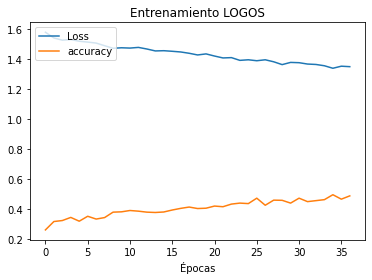

- Test: 
      Loss = 1.3098547458648682
      Accuracy = 0.5297619104385376

####**Segunda distribución**
- Distribución : 
      Batch_size = 20, [32,64,F,128,5], epochs = 50, patience = 10
- Entrenamiento:
      Duración = 21 épocas
      Loss = 1.2887
      Accuracy = 0.5201

- Gráfica de los valores loss y accuracy:

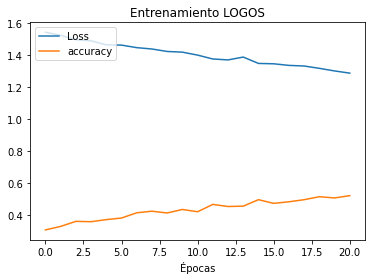

- Test: 
      loss = 1.340392827987671
      accuracy =  0.5

####**Tercera distribución**
- Distribución : 
      Batch_size = 40, [64,128,F,256,5], epochs = 25, patience = 10
- Entrenamiento:
      Duración = 23 épocas
      loss = 1.2627
      accuracy = 0.5254

- Gráfica de los valores loss y accuracy:

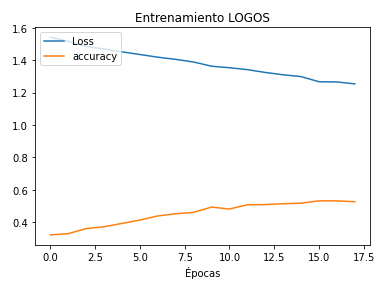

- Test: 
      loss = 1.3359954357147217
      accuracy = 0.523809552192688

####**Cuarta distribución**
- Distribución : 
      Batch_size = 100, [64,128,F,256,5], epochs = 100, patience = 10
- Entrenamiento:
      Duración = 28 épocas
      loss = 1.3580
      accuracy = 0.5029

- Gráfica de los valores loss y accuracy:

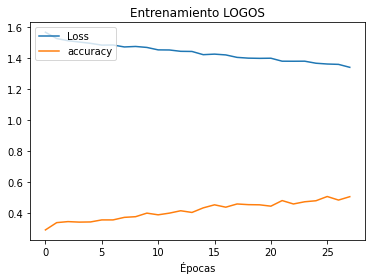

- Test: 
      loss = 1.3547308444976807
      accuracy = 0.5208333134651184

####**Quinta distribución**
- Distribución : 
      Batch_size = 100, [16,32,F,64,5], epochs = 100, patience = 12
- Entrenamiento:
      Duración = 14 épocas
      Loss = 1.4860 
      Accuracy = 0.3558

- Gráfica de los valores loss y accuracy:

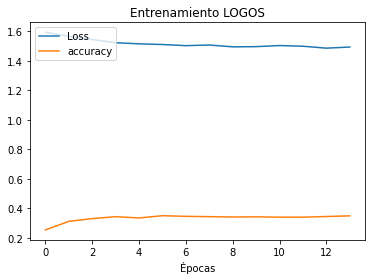

- Test: 
      Loss = 1.5262811183929443
      Accuracy = 0.4613095223903656

####**Sexta distribución**
- Distribución : 
      Batch_size = 100, [32,64,F,128,5], epochs = 100, patience = 12
- Entrenamiento:
      Duración = 43 épocas
      Loss =  1.3451
      Accuracy = 0.4752

- Gráfica de los valores loss y accuracy:

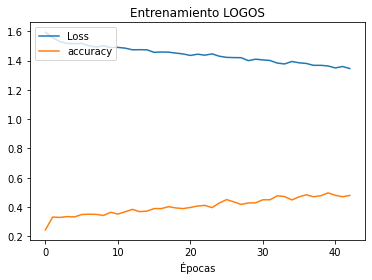

- Test: 
      Loss = 1.36008310317993
      Accuracy = 0.529761910438537




###**Comparativa**
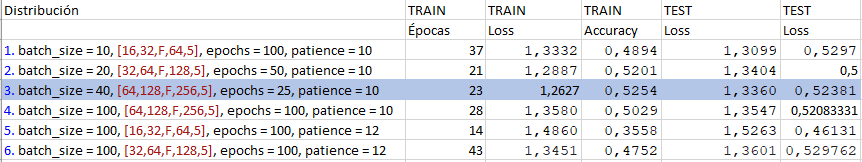

##**Distribución elegida**
Tras un gran analísis de los resultados terminamos eligiendo la distribución 3 correspondiente a **Batch_size = 40, [64,128,F,256,5], epochs = 25, patience = 10** porque su valor de epocas de entrenamiento antes que el earlyStopping interviniera es normal, su valor de accuracy durante el entrenamiento es el más alto, su valor ultimo valor de loss del entrenamiento es el más bajo y su generalización cumple con el mínimo.

Inicialmente se hicieron las pruebas 1, 2 y 3 luego nos extendimos a las 4, 5 y 6 buscando mejorar alguna de las obtenidas cambiando los hiperparámetros del batch_size y el patience.

A continuación mostraremos explicando todos los detalles de la red neuronal elegida, así como su correspondiente código.


In [ ]:
#Lo primero será montar nuestro sistema de archivos de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


test  train


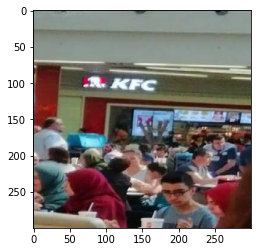

In [ ]:
#Haremos una pequeña prueba para ver que efectivamente tenemos acceso al sistema que montamos anteriormente.
!ls "/content/drive/MyDrive/content/logos/logos_v3_mini/logos3"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/MyDrive/content/logos/logos_v3_mini/logos3/train/KFC/ankamall_image_119.jpg', 'r')
imshow(np.asarray(pil_im))

In [ ]:
#Importamos una herramienta que usa Keras muy importante.
import tensorflow as tf
tf.test.gpu_device_name()

''

Ahora vamos a importar todas las librerías necesarias para poder realizar la práctica, usaremos como base la librería keras y los elementos concretos que vamos a utilizar se van a describir a continuación.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator  #Procesador de imágenes
from keras.models import Sequential                       #Vamos a usar el modelo secuencial de Keras==>Es una pila secuencial donde añadiremos las capas.
#from keras.layers import Dense, Dropout                   
from keras.optimizers import RMSprop                      #Usaremos el optimizador RMSprop donde se encuentra el optimizador Adadelta, el cual tiene una tasa de aprendizaje adaptativo.
from keras.layers import Dense, Dropout, Flatten          #Usaremos capas densas (FullConected), método Dropout (Evitar el sobreajuste), Capas Planas (Reunir todos los datos)
from keras.layers import Conv2D, MaxPooling2D             #Usaremos capas convolutivas (Distinguir entre varias características) y método de MaxPooling (Reducir el alto y ancho de los tensores resultantes).
from keras.callbacks import EarlyStopping                 #Parar de entrenar cuando ya no aumente el acurracy
from keras import backend as K
import keras                                              #Librería principal que nos ayudará a generar un modelo, entrenarlo y testearlo.
from time import time

##**Preparación del dataset**

Primero debemos seleccionar la ruta de los archivos primero las muestras para el entrenamiento y las muestras de test. Estas útimas muy importantes para saber si nuestra red es capaz de generalizar adecuadamente.

Para suplir el problema de cantidad y tamaño de imagenes Keras dispone de ImageDataGenerator, usaremos los métodos que van a ir dividiendo las imagenes en batches de 20.

Generaremos objetos de la clase ImageDataGenerator y luego mediante su metodo flow_from_directory podemos especificar:
- El directorio.
- La resolución.
- Tamaño del batch.
- Forma de clasificación (por categorías).

In [ ]:
batch_size = 40

train_data_dir = '/content/drive/MyDrive/content/logos/logos_v3_mini/logos3/train'
validation_data_dir = '/content/drive/MyDrive/content/logos/logos_v3_mini/logos3/test'

train_datagen = ImageDataGenerator(
        rescale=1./255                #Valores de los colores entre 0 y 255
        #rotation_range=15,
        #zoom_range=0.1
        )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(300, 300),   #La imagen será un array de dimensión 300x300 por cada canal de color.
        batch_size=batch_size,    
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='categorical')

Found 913 images belonging to 5 classes.
Found 336 images belonging to 5 classes.


##**Generación del modelo**

El modelo que vamos a generar será un modelo secuencial que tendrá la misma estructura vista en clase. Al modelo le iremos añadiendo las distintas capas con el metodo add(). Usaremos capas convolutivas (Conv2D) y capas densas (Dense) o fully conected.

Los metodos que usaremos son:
- MaxPooling, reduce en nuestro caso a la mitad el alto y ancho de los tensores generados por las capas convolutivas.
- Dropout, para evitar el sobre ajuste desactivamos un porcentaje dado de las neuronas de una capa.
- Flatten, linealizamos las neuronas de una capa.

Hasta ahora hemos usado la función de activación **sigmoide** porque dedujimos que era mejora para hallar el descenso por el gradiente y era deribable en el punto 0 cosa que el metodo por la inecuación no cumplía. Ahora vamos a emplear una función de activación aún más eficiente que Sigmoide, llamada **ReLU**.

ReLU(x)=max(0,x)

Tambien nos parece conveniente aportar información sobre el optimizador **AdaDelta()**. La optimización Adadelta es un método de descenso de gradiente estocástico que se basa en la tasa de aprendizaje adaptativo por dimensión para abordar dos inconvenientes:
- La continua decadencia de la tasa de aprendizaje durante el entrenamiento.
- La necesidad de seleccionar manualmente una tasa de aprendizaje manualmente.

Por último y no por ello menos importante hablaremos sobre la función de perdida **Categorical Cross Entropy**. El método tradicional consiste en hallar el sumatorio de los outputs de la red y sus correspondientes labels. Este nuevo método añade en su descripción el **encruzamiento** de entropías entre los label y los outputs. Siendo la formula la siguiente.
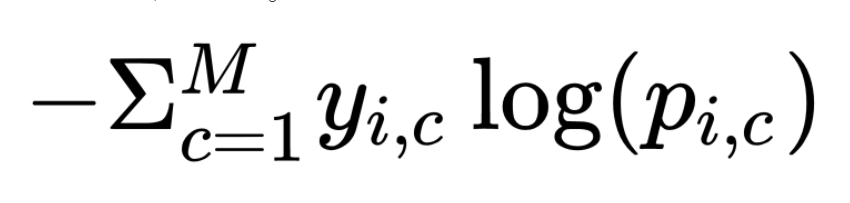

Fuente: https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789132212/3/ch03lvl1sec30/understanding-categorical-cross-entropy-loss#:~:text=Cross%20entropy%20loss%2C%20or%20log,diverges%20from%20the%20actual%20value.


In [ ]:
model = Sequential()

#Primera capa convolutiva 298x298x32
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(300, 300, 3))) #x=>alto y=>ancho z=>canales RGB
#Primera capa convolutiva con maxpooling 149x149x32
model.add(MaxPooling2D(pool_size=(2, 2)))

#Segunda capa convolutiva 147x147x64
model.add(Conv2D(128, (3, 3), activation='relu'))
#Segunda capa convolutiva con maxpooling 74x74x64
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25)) #Evitamos el sobreajuste, desactivar un porcentaje aletorio de neuronas.
#Tercera capa plana 350.464 neuronas
model.add(Flatten())

#Cuarta capa Full Conected donde existen 350.464 neuronas conectadas a 128 neuronas.
model.add(Dense(256, activation='relu'))

#La última capa se le aplica la función softmax para un mejor visualizado con 5 neuronas una por cada categoría.
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy, #Función de error o pérdida.
              optimizer=keras.optimizers.Adadelta(), #El optimizador.
              metrics=['accuracy']) #La precisión de las respuestas.

###**Cargar el modelo**

Para poder recuperar nuestra red ya entrenada de otras versiones debemos hacer uso load_model() de la librería Keras. Más adelante tambien usamos el metodo save_model().

In [ ]:
model = keras.models.load_model("mimodelo1.h5")

##**Entrenamiento la red neuronal**

Para verificar que vamos avanzando adecuadamente es conveniente ir comprobando el valor de 
la función de error loss.
Pero, lo que realmente nos va diciendo cuánto vamos mejorando es el accuracy (precisión)
metrics=['accuracy']. Este valor se calcula introduciendo las muestras en la red y
comprobando qué porcentaje de ellas ha clasificado correctamente.
Para evitar que el entrenamiento de la red se estanque, usaremos un objeto de la clase EarlyStopping donde nosotros aportamos un valor de paciencia.





In [ ]:
epochs = 25

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit_generator(
        train_generator,
        epochs=epochs, 
        validation_data=validation_generator,
        callbacks = [es]
)
model.save("mimodelo1.h5") #Con cada entrenamiento guardamos el estado del modelo.

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
23/23 [==============================] - 324s 14s/step - loss: 1.5806 - accuracy: 0.2696 - val_loss: 1.4047 - val_accuracy: 0.4554
Epoch 2/25
23/23 [==============================] - 324s 14s/step - loss: 1.4912 - accuracy: 0.3468 - val_loss: 1.4496 - val_accuracy: 0.4226
Epoch 3/25
23/23 [==============================] - 326s 14s/step - loss: 1.4869 - accuracy: 0.3568 - val_loss: 1.3591 - val_accuracy: 0.4673
Epoch 4/25
23/23 [==============================] - 322s 14s/step - loss: 1.4740 - accuracy: 0.3479 - val_loss: 1.3481 - val_accuracy: 0.4792
Epoch 5/25
23/23 [==============================] - 326s 14s/step - loss: 1.4516 - accuracy: 0.3905 - val_loss: 1.3278 - val_accuracy: 0.4792
Epoch 6/25
23/23 [==============================] - 329s 14s/step - loss: 1.4265 - accuracy: 0.4278 - val_loss: 1.3415 - val_accuracy: 0.5149
Epoch 7/25
23/23 [==============================] - 323s 14s/step - loss: 1.4142 - accuracy: 0.4372 - val_loss: 1.3755 - val_accuracy: 0.5089
Epoch 

###**Gráfica sobre el loss y el accuracy**

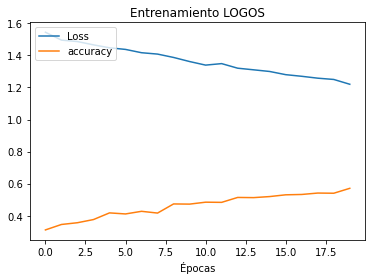

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['accuracy'], label='accuracy')

plt.title('Entrenamiento LOGOS')
plt.xlabel('Épocas')
plt.legend(loc="upper left")

plt.show()

##**Test**
Procederemos a hacer ver que tal se comporta la red recien entrenada a un conjunto de imagenes que jamás ha visto. Un conjunto que dividimos inicialmente para comprobar que nuestra red es capaz de generalizar.

In [ ]:
print(model.metrics_names)
model.evaluate(validation_generator)

['loss', 'accuracy']
9/9 [==============================] - 29s 3s/step - loss: 1.3351 - accuracy: 0.5179


[1.3350805044174194, 0.5178571343421936]

##**Producción**
Por último a modo de prueba vamos a elegir unas imagenes concretas y procederemos a ver si realmente distingue bien. Haremos uso del método **predict** para que nos diga a cual de las categorías pertenece. Y expresaremos 2 casos.

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im1 = Image.open('/content/drive/MyDrive/content/logos/logos_v3_mini/logos3/train/Starbucks/armada_image_338.jpg', 'r') #La reconoce mal
pil_im2 = Image.open('/content/drive/MyDrive/content/logos/logos_v3_mini/logos3/train/Starbucks/ankamall_image_1350.jpg', 'r') #La reconoce bien

Ejemplo donde la red no responde adecuadamente:

(300, 300, 3)


array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        5.1253835e-29]], dtype=float32)

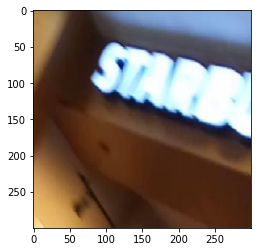

In [ ]:
im1 = np.asarray(pil_im1.resize((300, 300)))
imshow(im1)
print(im1.shape) # La imagen es un array de dimensión: 300x300x3

im1 = im1.reshape(1,300,300,3)
model.predict(im1)

Ejemplo donde la red responde adecuadamente:

(300, 300, 3)


array([[0., 0., 0., 1., 0.]], dtype=float32)

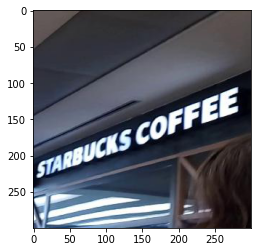

In [ ]:
im2 = np.asarray(pil_im2.resize((300, 300)))
imshow(im2)
print(im2.shape) # La imagen es un array de dimensión: 300x300x3

im2 = im2.reshape(1,300,300,3)
model.predict(im2)
